# Hover

```{epigraph}
An isolated rotor is difficult to simulate... the rotor community requires many more elements of the hovering rotorcraft to be reliably and swiftly simulated.
 
```
<p style="text-align:right" > <a href="https://www.aiaa-hpw.org/hpw-vision"> AIAA Rotorcraft Hover Prediction Workshop</a> </p>

We used the momentum theory to analyse the thrust, power and induced velocity relationships for a rotor in hover and in climb. A ton of assumptions were introduced in order to be able to form nice closed-form analytical expressions that can be used to do quick back-of-the-envelope calculations easily. Even though the induced power factor $\kappa$ was introduced for a more accurate estimate of induce power, by accounting for some of the effects not accounted for in momentum theory, the reality is far more complex and some of it is further discussed below. Suffice it to say that some of the brightest minds in the field of rotor aerodynamics get together on a regular basis at the AIAA conferences to share advancements that they've made towards accurately predicting every aspect of a hovering rotor using CFD from first principles. These include rotor power consumption, thrust generated, trim angles, tip vortex motion in wake etc. 

```{admonition} Ideal hover scenario
The blade aerodynamics is steady in hover since no variation occurs over one rotor revolution. A specific amount of rotor collective is applied and the rotor cyclics are zero. The result is a net thrust vector that is along the rotor shaft. Consequently, zero pitch and roll moments are generated. 
```

```{note} Real hover scenario
Helicopter center of gravity (CG) does not lie exactly below the rotor shaft. Fuel consumption, ingress/egress of equipment or passengers, payload drop etc. are some of the mechanisms via which CG might move about during hover. Even pilots shifting in their seats will affect the CG. Clearly CG directly below the rotor shaft is an unrealistic expection. So symmetric lift distribution over the rotor disk in hover is not viable. Uneven blockage effects from the fuselage, disturbance from the air, minor differences in blade construction (manufacturing defects) etc. exacerbate this situation. Additionally, the rotor shaft angle is tilted forward with respect to the fuselage in order to maintain a favorable fuselage attitude during high speed forward flight. During hover, the rotor disk needs to be tilted backwards, to account for the shaft tilt, and sidewards to account for the lateral force due to tail rotor thrust, so non-zero rotor cyclic angles become necessary in hover. 
``` 

## Definition

How do you define the hover state? Does the helicopter in the video below hover at any time during the shown manuever?

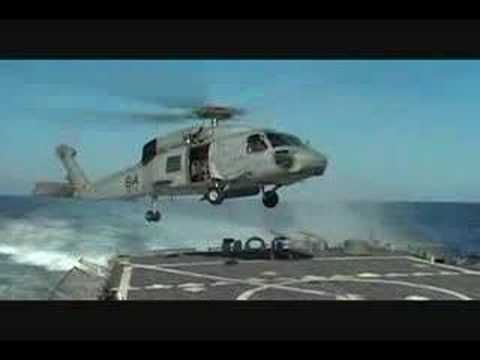

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('Jk3HRrMhrjw', width=500, height=270)

No. At no point during the maneuver shown does the free stream velocity become zero with respect to the helicopter.

## Hover at different MTOW

The maximum take-off weight (MTOW) of a given design can vary based on the amount of fuel and payload onboard. Clearly, even without considering the ability to achieve forward flight, a helicopter rotor has to be capable of producing varying amounts of thrust in order to balance the weight in these different scenarios. How is that achieved?

A wing can be made to generate varying lift via a number of mechanisms-

<div style="float:right; width:35%;" >
    <img src="../../assets/B28_fig1_12.png" class="bih" />
    <p style="text-align:center; color:gray; font-size:16px;"> Helicopter rotor blade pitch control via swashplate <a href="https://ntrs.nasa.gov/citations/19790013868"> [source]</a>  </p>
</div>

- vary area
    - change chord and/or radius
    - feasible but not a practical option
- vary dynamic pressure
    - via RPM control
    - helicopters have a fixed RPM though!
- vary $\alpha$
    - no direct control over $\alpha$ (due to $v_i$)
    - done by controlling blade pitch

While discussing airfoil aerodynamics, it is common to speak of the angle of attack as if it is a variable one has direct control over. While this works in the context of 2D aerodynamics, in the case of 3D (finite-wing) aerodynamics effects at the wing tips (see the following section) render $\alpha$ a byproduct of the aerodynamics and pitch angle serves as the more relevant control variable in its stead. Helicopter rotors control the amount of rotor thrust by changing the pitch angle of all the blades *collectively*. This is achieved by movement of the swashplate up and down along the shaft axis and the resulting pitch angle component is refered to simply as the **collective** and denoted $\theta_0$. The pitching motion of the blades itself is referred to as **feathering** (motion).

## Flowfield

The rotor wake discussed within the momentum theory model consisted of a uniform inflow velocity at the rotor disk and, correspondingly, also at every cross-section of the rotor streamtube. There were no additional aerodynamic *features* that were included because of the simplicity of the uniform pressure difference actuator disk model. In reality, a rotor is composed of discrete number of blades i.e. the lifting surfaces of the blades are finite and do not cover the entire rotor disk (as is implicitly assumed in the momentum theory approach). Additionaly, the rotor blades have a finite span that leads to critical phenomena occuring at the blade tips i.e. at the outboard edge of the rotor disk. The blade end towards the root cut-out region is not so relevant as will become clear.

<div style="float:right; width:43%;" >
    <img src="../../assets/bo105_schlieren.jpeg" class="big" />
    <p style="text-align:center; color:gray; font-size:16px;"> Bo 105 rotor wake visualized using Schlieren method <a href="https://www.greencarcongress.com/2014/01/20140109-dlr.html"> [source]</a>  </p>
</div>

- tip vortex roll up 
    - phenomena similar to fixed-wings
    - stronger than fixed-wing cases
    - blades generate most lift outboard
- root vortex also exists but much weaker
    - usually not even modelled 
- induced velocity $v_i$ is *due to* tip vortices
    - Biot-Savart law

It was mentioned earlier that, much like fixed-wing aircraft, helicopter rotor blades are finite wings (i.e. have a finite span) and exhibit similar aerodynamic phenomena of vortex roll-up at the tip. This contributes to additional power consumption, within the momentum theory model, because the blades are aerodynamically less efficient due to the vortex roll-up phenomena. You can think of it as an equivalent reduction in the rotor radius but instead of using an equivalent rotor radius, that is smaller than the radius of the real rotor being modelled,  the effect is simply manifested via the $\kappa$ parameter.  


<div style="float:left; " >
    <img src="../../assets/B0_3_12.png" class="large" />
    <p style="text-align:left;font-size:16px; color:gray;"> Rotor wake model using vortex theory (taken from Rotor Aeromechanics by Wayne Johnson) </p>
</div>

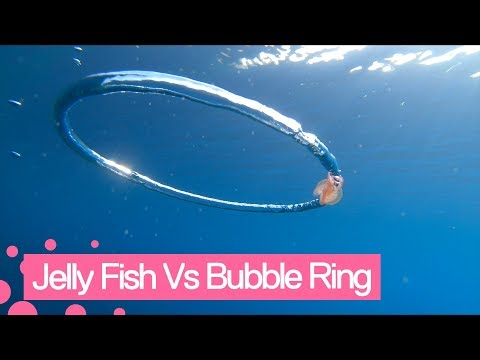

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('JXkWSgU-CL0', width=400, height=200)

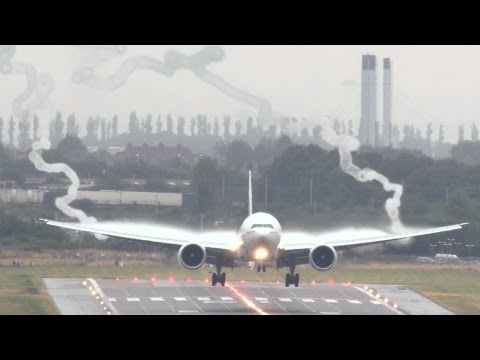

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('ViKYFsN3p24', width=400, height=200)

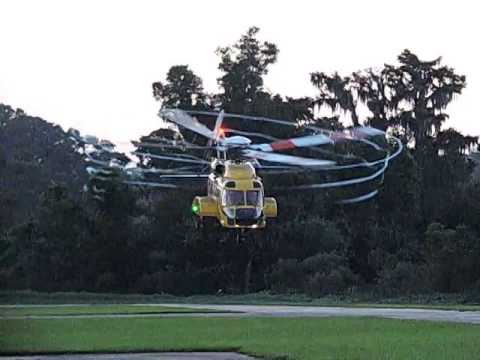

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('lslarZiRJhg', width=400, height=200)

In order to accurately model a rotor in hover, the effect of the tip vortices needs to be captured with a high degree of accuracy. These strong concentrated *tornadoes* of air have a significant influence on the local aerodynamics at each blade section. This influence reduces with the distance from the tip vortex but that doesn't mean that the inboard sections are shielded from this effect. As is clear from the foregoing discussion, tip vortices from preceding blades can pass close to the inboard sections of the following blades. In extreme scenarios like when the helicopter suddenly pitches or during a descent maneuver, the blades end up *slicing* through the tip vortices from preceding blades. This phenomenon is refered to as BVI (blade vortex interaction) and is a source of high vibrations felt within the helicopter fuselage and high noise radiation. Quite simply, this is due to sudden loading changes that occur on the blade as shown in the figure below.

<center>
    <img src="../../assets/B0_fig9_22.png" class="big">
    <p  style="font-size:16px; color:gray; text-align:center;"> Schematic of blade-vortex interaction and the induce loading <a href="https://www.cambridge.org/core/books/rotorcraft-aeromechanics/6DE729BB2AFED9F94E59823086568C1E">[source] </a></p>

</center>

'Free-wake' models are commonly used to model rotor tip vortices as shown below. There are many more solution strategies to model the effects of vortices trailing from the rotor blades and some of these are implemented in the rotor analysis codes such as CAMRAD II, RCAS, CHARM, Dymore etc. - these are just some of the standard codes used for rotorcraft analyses in industry and academia. The induced velocity, from these vortices, is calculated using the Biot-Savart law and gives a more accurate estimate compared to the annular momentum theory that was introduced in the BEMT chapter. It is worth noting the constriction of the rotor streamtube in the wake of the rotor. This constriction has been observed to occur for rotors in reality and is something that the momentum theory models as well.  

<center>
    <img src="../../assets/4blade_hover.gif" class="medium">
    <p style="text-align:center; color:gray; font-size:16px;"> Free-wake simulation of a 4 bladed rotor in hover flight </p>

</center>

The above description of the effects of the trailing tip vortices on the induced velocity, and therefore on induced power itself, might make a casual observer think that a straightforward implementation of design solutions used on fixed-wing aircraft to minimize induced drag might work just as well for rotors. Bell Textron Inc has recently procured a <a href="https://patents.google.com/patent/US10625847B2/en">patent</a> on that front but, as is true with any other patent application, there is limited supporting data provided whether the mechanism actually would perform its desired function without having any detrimental effects (viz. high vibration and high drag in forward flight). Forward flight performance is particularly relevant because induced power forms a smaller and smaller proportion of the overall power consumption as helicopter flight speed is increased.

<center>
    <img src="../../assets/Bell_patent_splitwinglet.png" class="medium">
    <p  style="font-size:16px; color:gray; text-align:center;"> Bell patent: Split-winglet on rotor blades <a href="https://patents.google.com/patent/US10625847B2/en">[source] </a></p>

</center>

## "Steady" aerodynamics hover

It might appear that the hover, given the symmetry of flow conditions and their steady state nature, would be computationally the easiest flight state to model. However, the simple fact remains that the trailing tip vortices do not quickly convect away from the rotor (how would they? small $v_i$ is desirable, remember), unlike in fixed-wing flight. Consequently accounting for the influence of tip vortices on rotor blades is of paramount importance and small deficiencies in the modelling strategies can lead to inaccurate vortex strengths and/or trajectories. This in turn has an influence on the blade loads and vice versa - local blade aerodynamics affects the wake and the wake influences the blade aerodynamics. 

The following show results from a rotor hover test carried out on a calm night on a whirl tower. The variations registered in the measurements suggest that slight unsteadiness associated with evolution of the tip vortices can have a non-negligible influence on the rotor aerodynamics. Fluctuations of ~1% are not negligible and a difference of 0.015 in FM distinguishes a better rotor from a good one. 

<center>
    <img src="../../assets/Prouty_I_10-2.png" class="big">
    <p style="font-size:16px; color:gray; text-align:center;" >Variability in rotor performance in hover [taken from Helicopter Aerodynamics I by RW Prouty] </p>
</center>

When analysing a coaxial rotor design in hover the situation is even worse. Due to the passing of lifting surfaces (i.e. blades) in close proximity to each other, the rotors no longer behave as the sum of two isolated rotors.   

<div class="image-grid">
    <img  src="../../assets/X2.jpeg" class="big"/>
    <img  src="../../assets/Raider.jpeg" class="big"/>
    <img  src="../../assets/Defiant.jpg" class="big" />
</div>

<div class="image-grid">
  <p style="font-size:16px; color:gray; text-align:left;"> Sikorsky X2 <a href="https://www.wired.com/2010/08/sikorsky-x2-breaks-helicopter-speed-record/"> [source]</a></p>   
  <p style="font-size:16px; color:gray; text-align:left;"> Sikorsky S-97 Raider <a href="https://en.wikipedia.org/wiki/Sikorsky_S-97_Raider#/media/File:Sikorsky_S-97_Raider_in_flight.jpg"> [source]</a></p>
  <p style="font-size:16px; color:gray; text-align:left;"> Sikorsky Boeing SB-1 Defiant <a href="https://en.wikipedia.org/wiki/Sikorsky%E2%80%93Boeing_SB-1_Defiant#/media/File:Sikorsky%E2%80%93Boeing_SB-1_Defiant_(cropped).jpg"> [source]</a></p>
</div>

<div style="float:right; width:43%;" >
    <img src="../../assets/AT1_6_6.png" class="big" />
    <p style="text-align:center; color:gray; font-size:16px;"> Sikorsky X2-like rotor in hover <a href="https://deepblue.lib.umich.edu/handle/2027.42/163227"> [source]</a>
  </p>
</div>

- load oscillations due to blade passage 
- 2$N_b$ blade passes per revolution
    - vibration at 2$N_b$/rev
- oscillation $\approx 20\%$ of mean thrust

```{admonition} Aside
Do you think the fluctuating normal force coefficient CFz, as shown in the figure, generated by each rotor can be obtained using any of the theories that we have learnt so far in the course?
```

Such high thrust oscillations are intrinsic to coaxial rotor designs. High vibrations were one of the reasons that Sikorsky <a href="https://www.sikorskyarchives.com/S-69%20(XH-59A).php">discontinued the XH-59A program </a> (precursor to the succesful X2 demonstrator). They still exist on the <a href="https://en.wikipedia.org/wiki/Sikorsky_S-97_Raider">Raider </a> and <a href="https://en.wikipedia.org/wiki/Sikorsky%E2%80%93Boeing_SB-1_Defiant">Defiant </a> designs, currently being extensively tested as a viable proposal to replace ageing helicopter fleet in the US armed forces, but are taken care of using vibration supressors.

Another aspect of rotor design worth mentioning here is from the structural design point of view. Consider for e.g. the cases of the Bo 105 rotor ($R= 4.912$ m, blade weight $m_b\approx 45$ kg, and $\Omega = 44.505$ rad/s) and the UH60 rotor ($R= 8.178$ m, blade weight $m_b\approx 95$ kg, and $\Omega = 27.017$ rad/s). The former is a 2.5 ton helicopter and the latter a 10 ton design. 

\begin{align}
\text{Bo 105 hinge force} &\approx m_b*\Omega^2 *(R/2)\\
&= 218906 \quad \text{N} \\
\text{UH60 hinge force} &\approx m_b*\Omega^2 *(R/2)\\
&= 283540 \quad \text{N} \\
\end{align}

The hinge where the blades are attached to the rotor head experience incredibly high radial forces because of centrifugal loads on the blades. If the blades are all exactly alike, these high loads are not of huge concern because they would be balanced by an equal centrifugal force on the other blades. For this reason, helicopter rotors are, much like propellers or turbine rotors, precisely built to specifications and with minimal engineering tolerances so that each blade is alike structurally and aerodynamically. However, during manufacturing slight mismatches do occur in structural mass distribution, for e.g., that lead to unbalanced forces acting on the rotor shaft resulting in the vibration felt within the fuselage. An ideal computational analysis of a rotor in hover - i.e. blades with matching properties and assuming azimuthal symmetry - will result in the induced vibration by the rotor being zero.